In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.shape

(145460, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.head

<bound method NDFrame.head of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W  

In [6]:
df = df.dropna()

In [7]:
# Вибірка числових ознак
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Нормалізація даних та створення копії датасету
df_norm = df.copy()
df_norm.loc[:, numeric_cols] = (df.loc[:, numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

In [8]:
X = df_norm.drop(['RainTomorrow'], axis = 1)
Y = df_norm['RainTomorrow']

In [9]:
# Вибірка ознак та цільової змінної
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
target = ['RainTomorrow']


<AxesSubplot:>

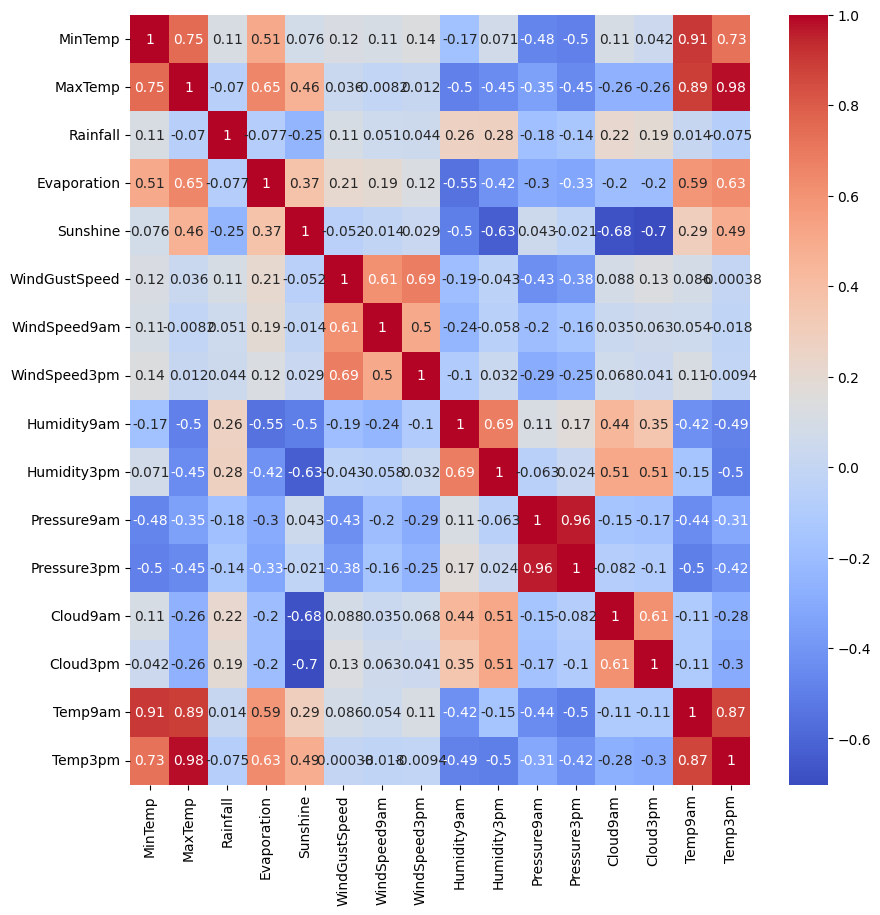

In [10]:
# Побудова heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df[features + target].corr(), annot=True, cmap='coolwarm')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

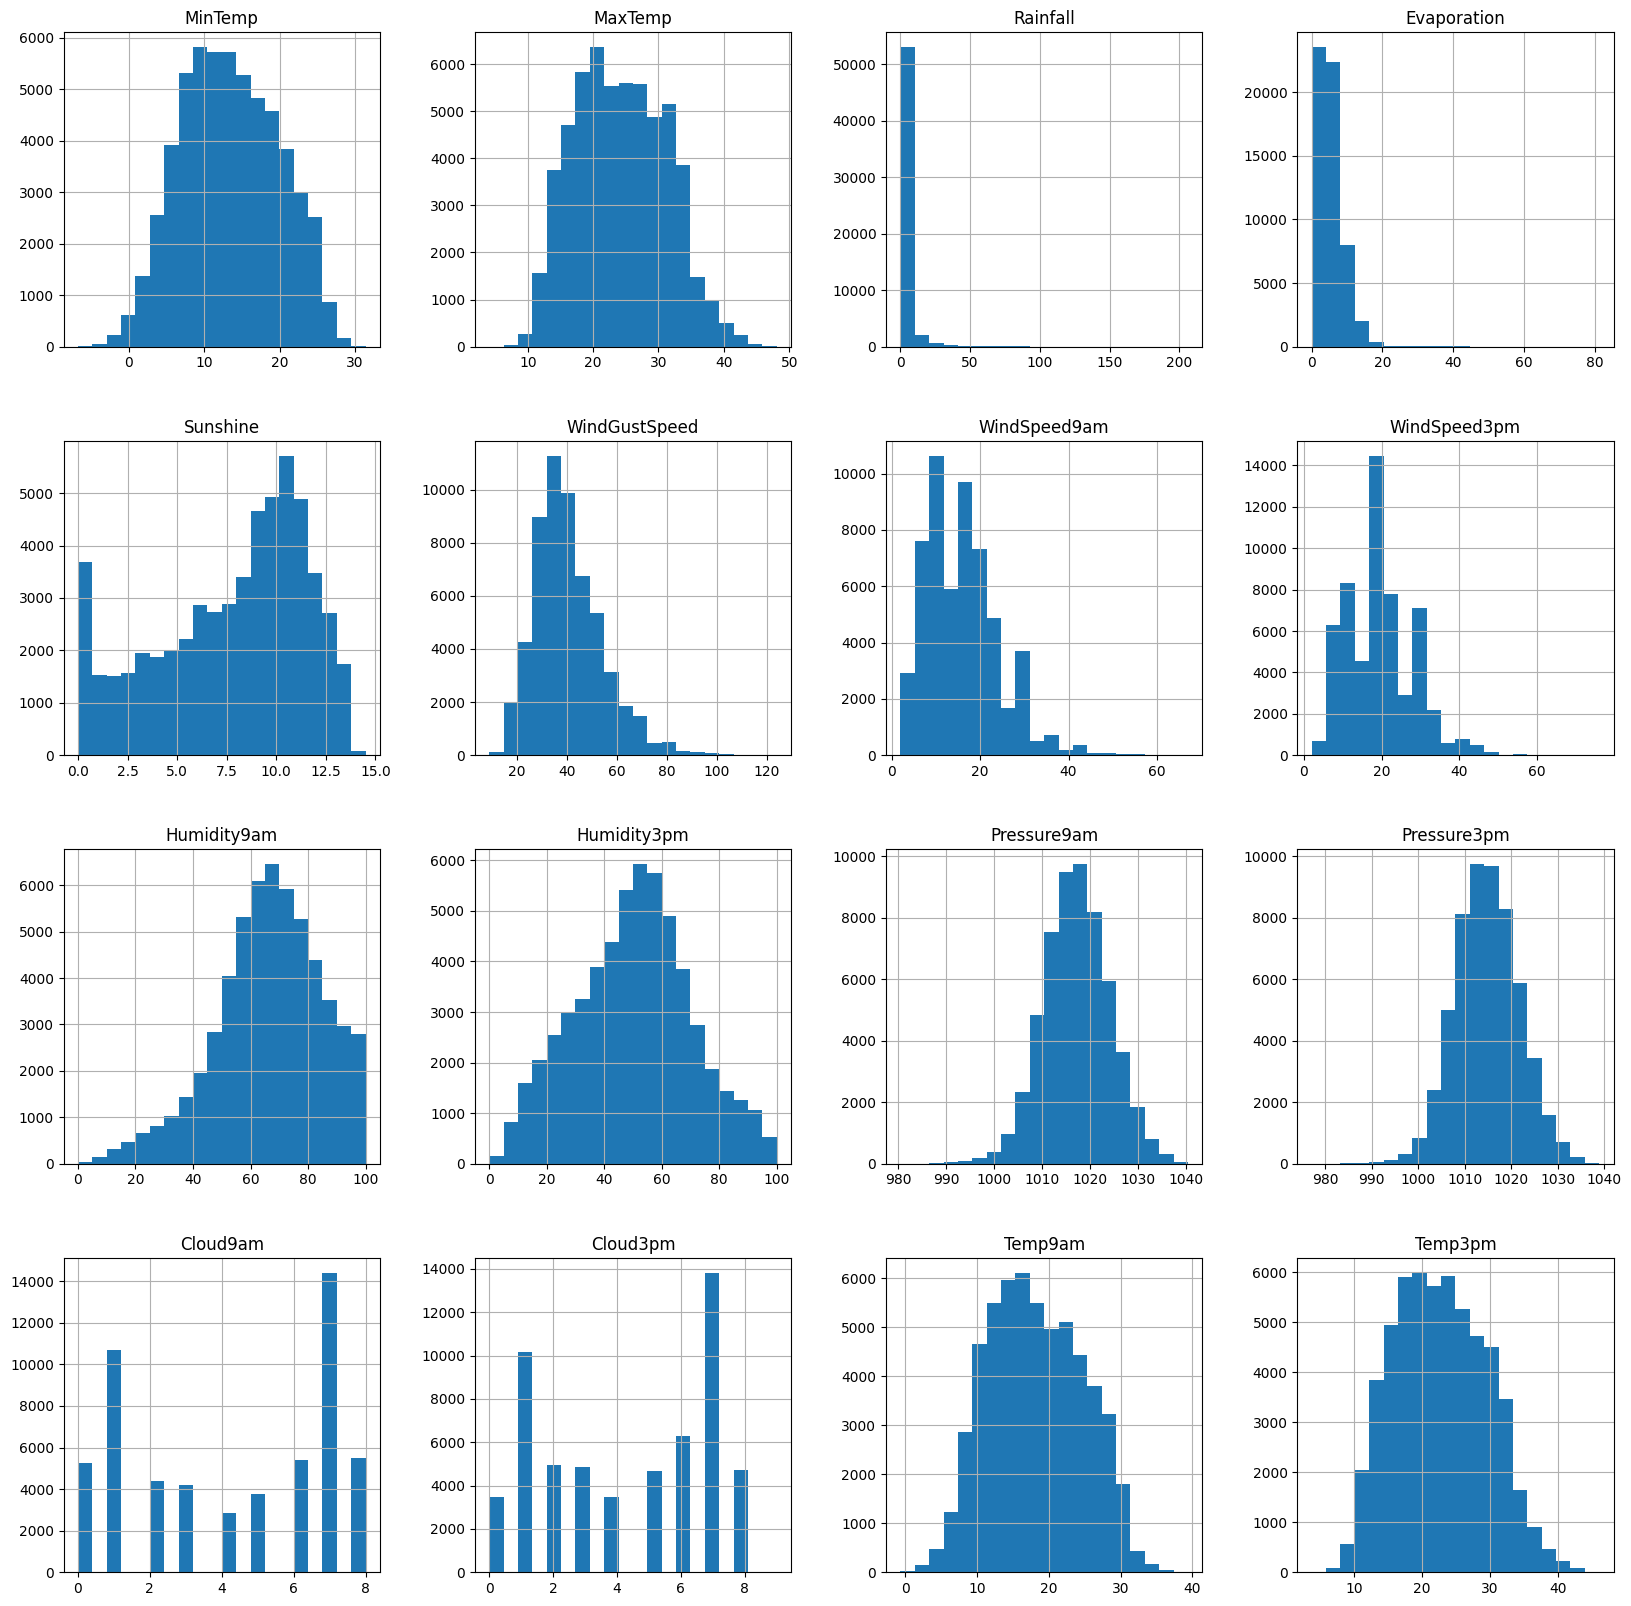

In [11]:
# Побудова гістограм розподілу ознак
df[features].hist(figsize=(20, 20), bins=20)

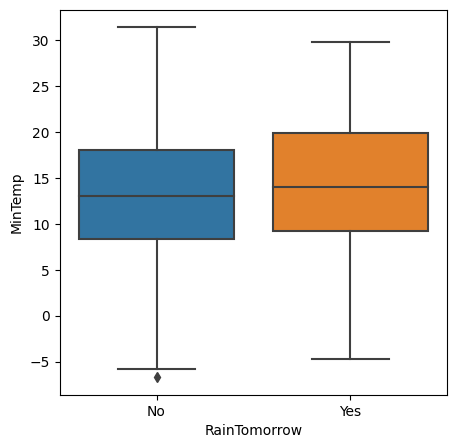

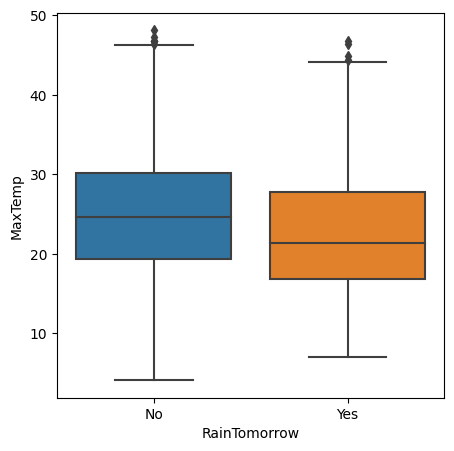

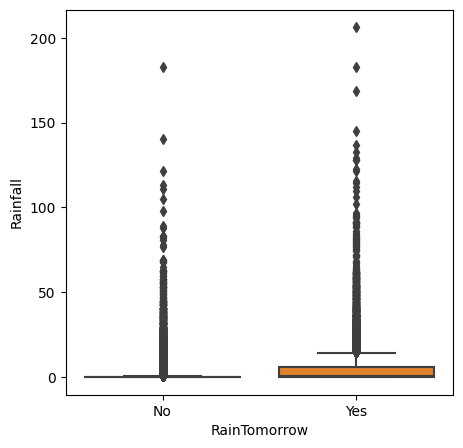

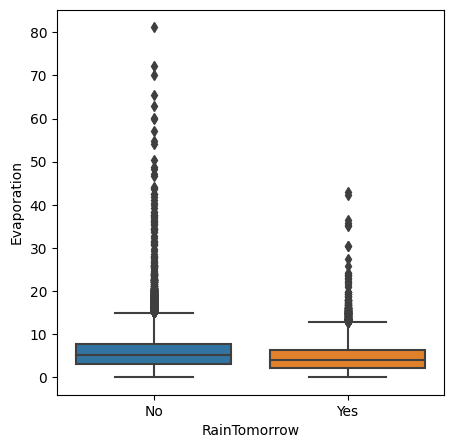

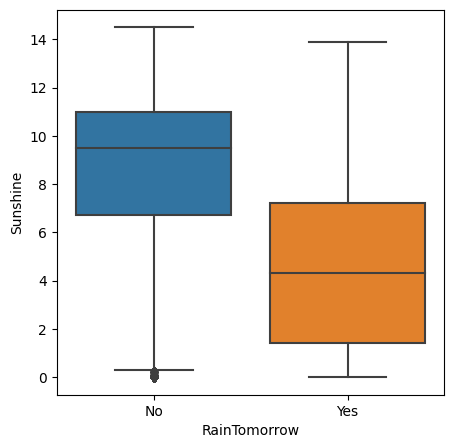

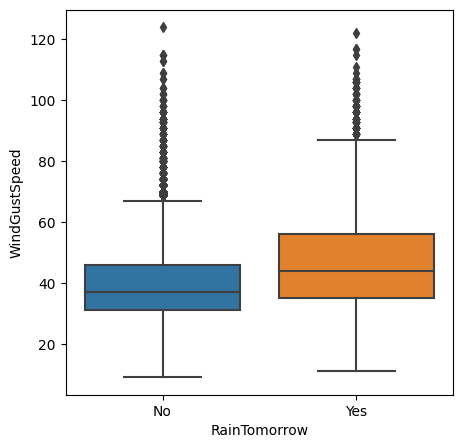

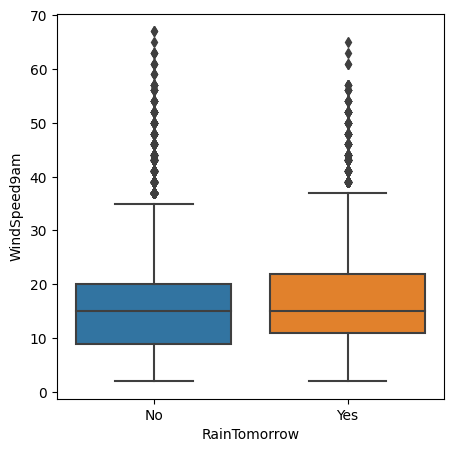

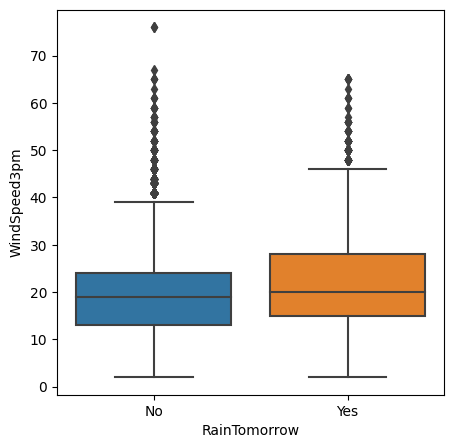

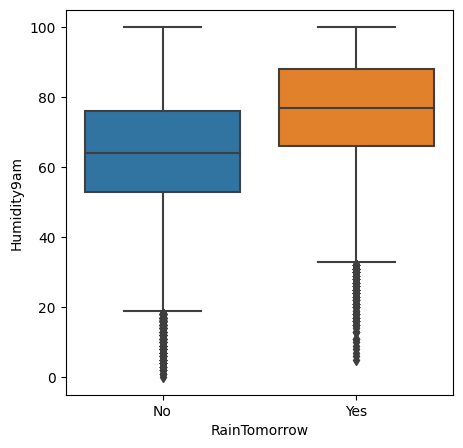

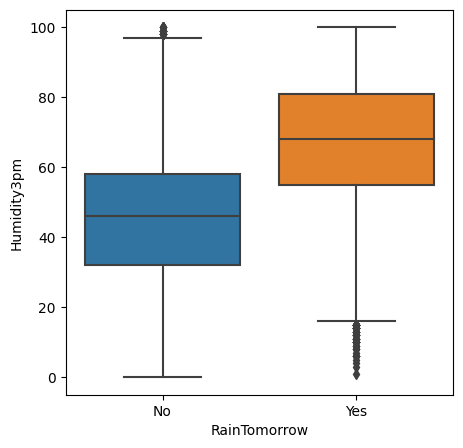

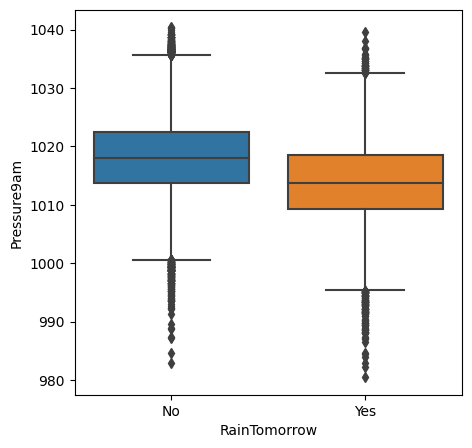

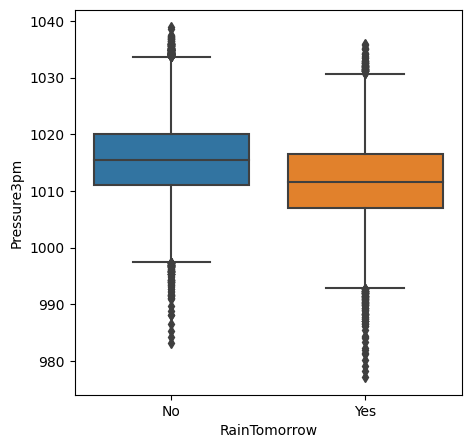

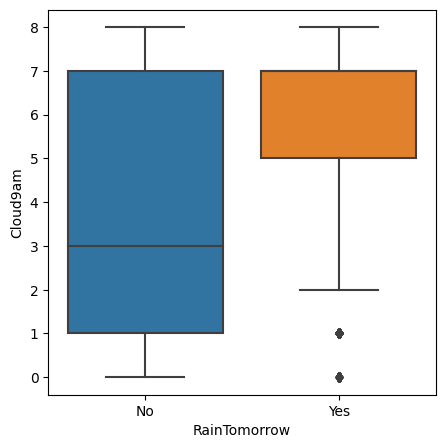

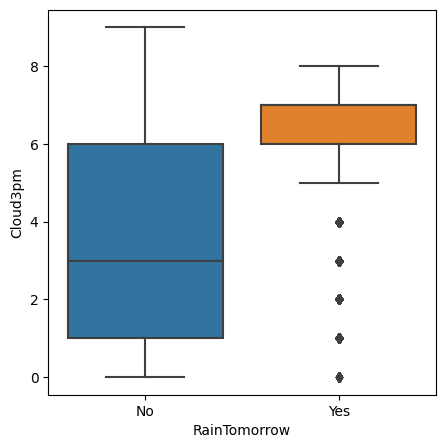

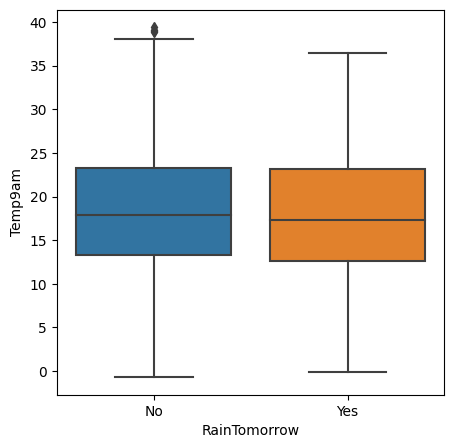

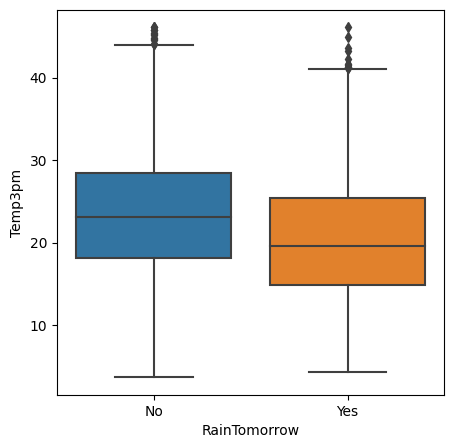

In [12]:
# Побудова boxplot-ів ознак відносно цільової змінної
for feature in features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=target[0], y=feature, data=df)

In [13]:
# Розділення датасету на тренувальну та тестову вибірки



X_train, X_test, y_train, y_test = train_test_split(df_norm[features], df[target], test_size=0.2)


# Навчання класифікатора дерева ухвалення рішень
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Навчання класифікатора Adaboost з оптимальними параметрами
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

# Навчання класифікатора Random Forest з оптимальними параметрами
rf = RandomForestClassifier(n_estimators=10, max_features='auto')
rf.fit(X_train, y_train)

# Вивід sklearn.metrics.classification_report
print(sklearn.metrics.classification_report(y_test, dtc.predict(X_test)))
print(sklearn.metrics.classification_report(y_test, ada.predict(X_test)))
print(sklearn.metrics.classification_report(y_test, rf.predict(X_test)))

# Вивід sklearn.metrics.confusion_matrix
print(sklearn.metrics.confusion_matrix(y_test, dtc.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, ada.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, rf.predict(X_test)))

C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\dmitr\AppData\Local\Temp\ipykernel_17400\804663835.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

          No       0.88      0.86      0.87      8838
         Yes       0.53      0.57      0.55      2446

    accuracy                           0.80     11284
   macro avg       0.71      0.71      0.71     11284
weighted avg       0.80      0.80      0.80     11284

              precision    recall  f1-score   support

          No       0.88      0.94      0.91      8838
         Yes       0.72      0.54      0.61      2446

    accuracy                           0.85     11284
   macro avg       0.80      0.74      0.76     11284
weighted avg       0.84      0.85      0.85     11284

              precision    recall  f1-score   support

          No       0.87      0.95      0.91      8838
         Yes       0.74      0.50      0.60      2446

    accuracy                           0.85     11284
   macro avg       0.81      0.73      0.75     11284
weighted avg       0.84      0.85      0.84     11284

[[7622 1216]
 [1061

In [14]:
# Навчання класифікатора kNN з оптимальними параметрами
knn = KNeighborsClassifier(n_neighbors=5)
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid_knn, refit=True)
grid_knn.fit(X_train, y_train)

# Навчання класифікатора SVM з оптимальними параметрами
svm = SVC(kernel='linear')
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_svm = GridSearchCV(svm, param_grid_svm, refit=True)
grid_svm.fit(X_train, y_train)

print(sklearn.metrics.classification_report(y_test, grid_knn.predict(X_test)))
print(sklearn.metrics.classification_report(y_test, grid_svm.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, grid_knn.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, grid_svm.predict(X_test)))

C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

KeyboardInterrupt: 